# : Imports

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../"))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.PostgresLoader import PostgresLoader
from src.YOLOImageDetector import YOLOImageDetector

# Instantiate the detector

In [2]:
detector = YOLOImageDetector(model_path="yolov8n.pt")

# Run detection

In [3]:
image_folder = "../data/raw/2025-07-10/images"
detections_df = detector.detect_objects_in_folder(image_folder)
detections_df.head()


image 1/1 d:\AI Mastery\Project\Telegram-Data-to-API\notebooks\..\data\raw\2025-07-10\images\HakimApps_Guideline\1862.jpg: 448x640 (no detections), 231.6ms
Speed: 2.9ms preprocess, 231.6ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 d:\AI Mastery\Project\Telegram-Data-to-API\notebooks\..\data\raw\2025-07-10\images\HakimApps_Guideline\1863.jpg: 640x352 1 remote, 1 cell phone, 164.4ms
Speed: 1.4ms preprocess, 164.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)

image 1/1 d:\AI Mastery\Project\Telegram-Data-to-API\notebooks\..\data\raw\2025-07-10\images\HakimApps_Guideline\1864.jpg: 640x352 (no detections), 34.6ms
Speed: 1.6ms preprocess, 34.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 352)

image 1/1 d:\AI Mastery\Project\Telegram-Data-to-API\notebooks\..\data\raw\2025-07-10\images\HakimApps_Guideline\1865.jpg: 640x352 (no detections), 36.1ms
Speed: 1.6ms preprocess, 36.1ms inference, 0.5ms postprocess per image at 

,message_id,detected_object_class,confidence_score
0,1863,remote,0.335181
1,1863,cell phone,0.317298
2,1872,tv,0.405572
3,1874,person,0.759605
4,1886,cell phone,0.511445


# Load into PostgreSQL

In [4]:
loader = PostgresLoader()
loader.insert_detections(detections_df)
loader.close()


1230 records inserted.


## : Write detections to CSV

In [5]:
detections_df.to_csv("../data/yolo_detections.csv", index=False)

## : Summarize detections

In [15]:
detections_df['detected_object_class'].value_counts().head(15)

detected_object_class
person          553
bottle          184
book             81
clock            50
chair            49
tie              40
cell phone       39
tv               28
stop sign        21
refrigerator     20
cup              19
laptop           11
dining table      9
remote            9
kite              9
Name: count, dtype: int64

#### : Detected Object Classes

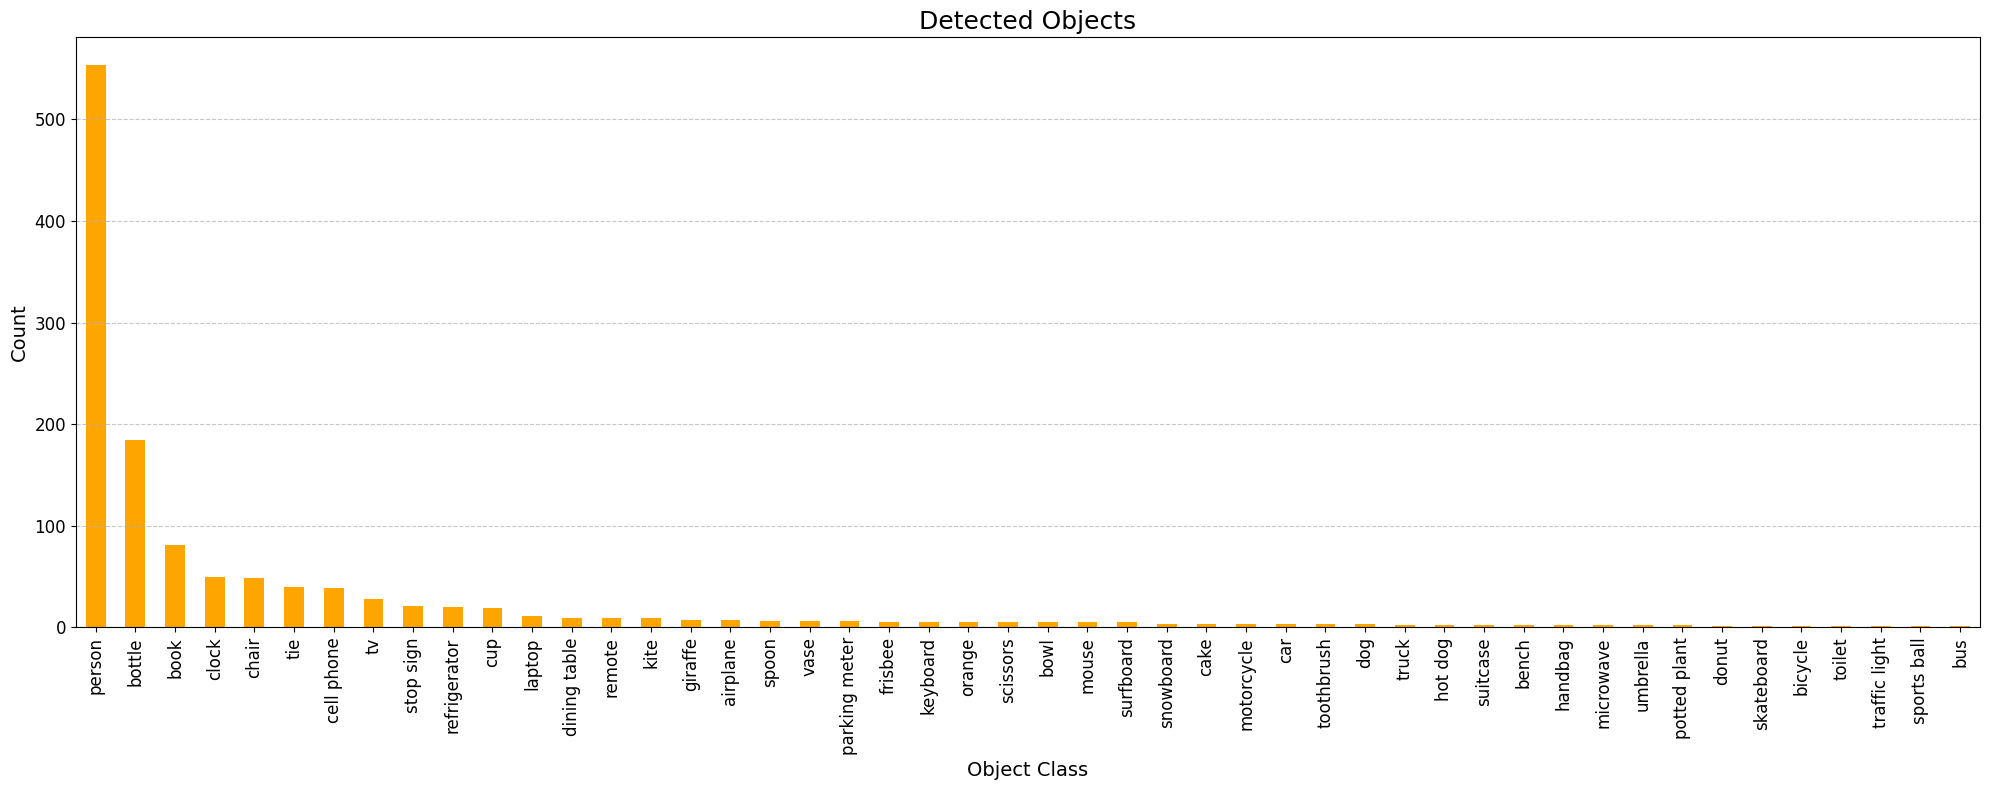

In [14]:
import matplotlib.pyplot as plt

# Prepare data
top_classes = detections_df['detected_object_class'].value_counts()

# Plot
plt.figure(figsize=(20, 8))
top_classes.plot(kind='bar', color='orange')

# Customize fonts
plt.title('Detected Objects', fontsize=18)
plt.xlabel('Object Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
